In [1]:
import random
from pathlib import Path
from math import sqrt, pi

import numpy as np
from scipy.stats import ttest_rel, ttest_ind
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# Load in all csv result files & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run3_volume_sampling/NearestNeighborResults_VolumeSampling_'

results = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    results = pd.concat([results, curr_well])

array(['Area_of_Cytoplasm', 'Label',
       'Mean_Of_mean_nn_distances_simulated_10',
       'Mean_Of_mean_nn_distances_simulated_100',
       'Mean_Of_mean_nn_distances_simulated_1000',
       'Mean_nn_distances_measured', 'Mean_nn_distances_simulated',
       'Mean_protein_intensity_around_pbodies',
       'Mean_protein_intensity_cytoplasm', 'Number_of_pbodies', 'SiteX',
       'SiteY', 'Well', 'p-value_measured_lower_1000_sim'], dtype=object)

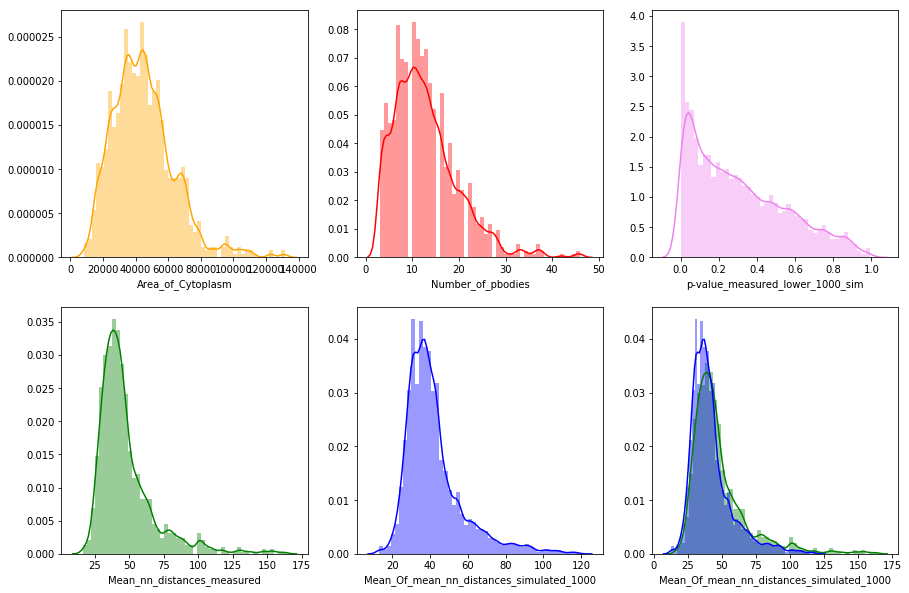

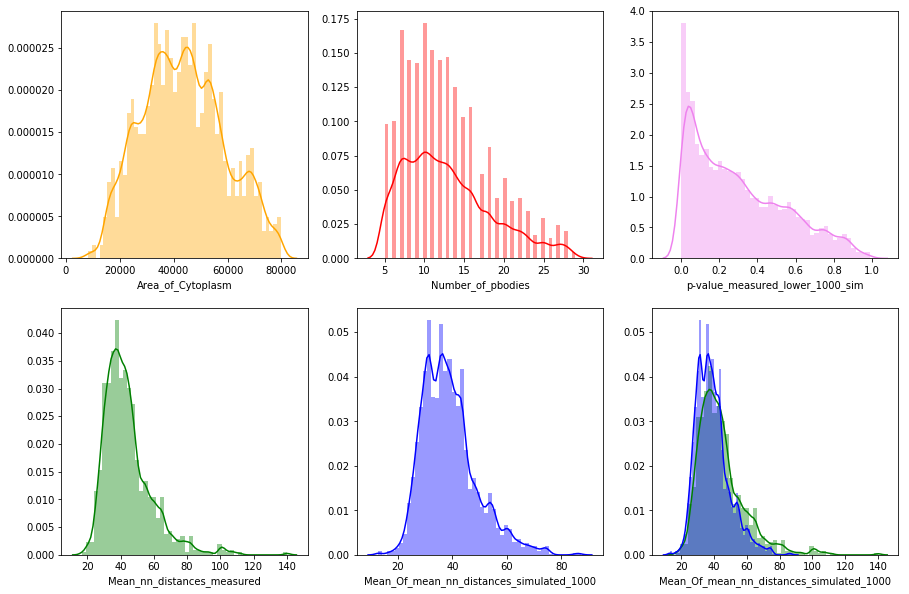

In [4]:
# Filter out outliers in numbers of P bodies
#fig, ax = plt.subplots(2, 3, figsize=(15, 10))
#sns.distplot(results['Area_of_Cytoplasm'], ax=ax[0][0], color='orange')
#sns.distplot(results['Number_of_pbodies'], ax=ax[0][1], color='red')
#sns.distplot(results['p-value_measured_lower_1000_sim'], ax=ax[0][2], color='violet')
#sns.distplot(results['Mean_nn_distances_measured'], ax=ax[1][0], color='green')
#sns.distplot(results['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][1], color='blue')
#sns.distplot(results['Mean_nn_distances_measured'], ax=ax[1][2], color='green')
#sns.distplot(results['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][2], color='blue')

# select rows where `Area_of_Cytoplasm` has value > 80'000
normal_size = (results['Area_of_Cytoplasm'] < 80000)
normal_pbodies = (results['Number_of_pbodies'] >= 5)
normal_pbodies2 = (results['Number_of_pbodies'] < 30)

# extract those rows into a new table
results_cleaned = results.loc[normal_size & normal_pbodies & normal_pbodies2]
fig2, ax2 = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(results_cleaned['Area_of_Cytoplasm'], ax=ax2[0][0], color='orange')
sns.distplot(results_cleaned['Number_of_pbodies'], ax=ax2[0][1], color='red')
sns.distplot(results_cleaned['p-value_measured_lower_1000_sim'], ax=ax2[0][2], color='violet')
sns.distplot(results_cleaned['Mean_nn_distances_measured'], ax=ax2[1][0], color='green')
sns.distplot(results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][1], color='blue')
sns.distplot(results_cleaned['Mean_nn_distances_measured'], ax=ax2[1][2], color='green')
sns.distplot(results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][2], color='blue')

# Make histograms for 
results.columns.values

In [5]:
percentage_pbodies_on_nucleus = (results_cleaned['Number_of_pbodies_in_Nucleus']) / (results_cleaned['Number_of_pbodies'] + results_cleaned['Number_of_pbodies_in_Nucleus'])
print(np.mean(percentage_pbodies_on_nucleus))

0.07388164486065184


In [6]:
# Run paired t-test to compare mean-nn distances measured with Mean of 1000 simulation means
ttest_rel(results_cleaned['Mean_nn_distances_measured'], results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'])

Ttest_relResult(statistic=43.72602053172947, pvalue=0.0)

-5.4544748850606615

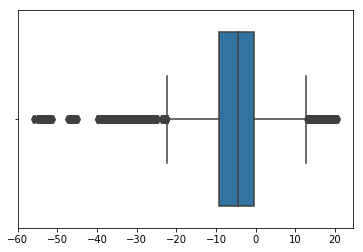

In [5]:
# plot difference measured to predicted
difference_in_nearest_neighbour_1000 = results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'] - results_cleaned['Mean_nn_distances_measured']

sns.boxplot(difference_in_nearest_neighbour_1000)

np.mean(difference_in_nearest_neighbour_1000)

In [ ]:
# Compare results from 1, 10, 100 & 1000 simulations

In [5]:
# Load in all csv result files & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run2_randomSampling_uniform_ExcludeNuclearPbodies/NearestNeighborResults_'

results_non_volume = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    results_non_volume = pd.concat([results_non_volume, curr_well])

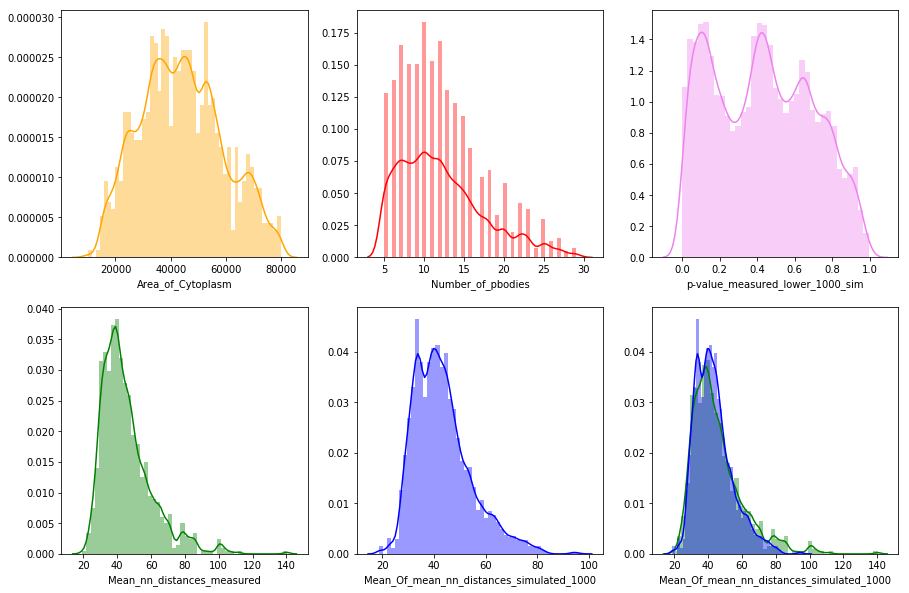

In [6]:
# Filter out outliers in numbers of P bodies
#fig, ax = plt.subplots(2, 3, figsize=(15, 10))
#sns.distplot(results_non_volume['Area_of_Cytoplasm'], ax=ax[0][0], color='orange')
#sns.distplot(results_non_volume['Number_of_pbodies'], ax=ax[0][1], color='red')
#sns.distplot(results_non_volume['p-value_measured_lower_1000_sim'], ax=ax[0][2], color='violet')
#sns.distplot(results_non_volume['Mean_nn_distances_measured'], ax=ax[1][0], color='green')
#sns.distplot(results_non_volume['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][1], color='blue')
#sns.distplot(results_non_volume['Mean_nn_distances_measured'], ax=ax[1][2], color='green')
#sns.distplot(results_non_volume['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax[1][2], color='blue')

# select rows where `Area_of_Cytoplasm` has value > 80'000
normal_size = (results_non_volume['Area_of_Cytoplasm'] < 80000)
normal_pbodies = (results_non_volume['Number_of_pbodies'] >= 5)
normal_pbodies2 = (results_non_volume['Number_of_pbodies'] < 30)

# extract those rows into a new table
results_non_volume_cleaned = results_non_volume.loc[normal_size & normal_pbodies & normal_pbodies2]
fig2, ax2 = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(results_non_volume_cleaned['Area_of_Cytoplasm'], ax=ax2[0][0], color='orange')
sns.distplot(results_non_volume_cleaned['Number_of_pbodies'], ax=ax2[0][1], color='red')
sns.distplot(results_non_volume_cleaned['p-value_measured_lower_1000_sim'], ax=ax2[0][2], color='violet')
sns.distplot(results_non_volume_cleaned['Mean_nn_distances_measured'], ax=ax2[1][0], color='green')
sns.distplot(results_non_volume_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][1], color='blue')
sns.distplot(results_non_volume_cleaned['Mean_nn_distances_measured'], ax=ax2[1][2], color='green')
sns.distplot(results_non_volume_cleaned['Mean_Of_mean_nn_distances_simulated_1000'], ax=ax2[1][2], color='blue')

# Make histograms for 
#results.columns.values

-2.250004382002384

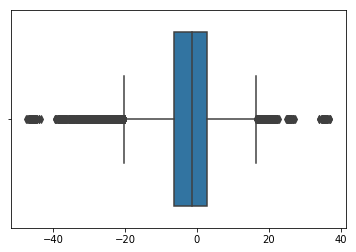

In [7]:
# plot difference measured to predicted
difference_in_nearest_neighbour_1000_area = results_non_volume_cleaned['Mean_Of_mean_nn_distances_simulated_1000'] - results_non_volume_cleaned['Mean_nn_distances_measured']
difference_in_nearest_neighbour_1000 = results_cleaned['Mean_Of_mean_nn_distances_simulated_1000'] - results_cleaned['Mean_nn_distances_measured']

sns.boxplot(difference_in_nearest_neighbour_1000_area)


# combine two vectors to make a combined boxplot


np.mean(difference_in_nearest_neighbour_1000_area)

(32262, 14)
(31274, 23)


array(['Area_of_Cytoplasm_volume', 'Label',
       'Mean_Of_mean_nn_distances_simulated_10_volume',
       'Mean_Of_mean_nn_distances_simulated_100_volume',
       'Mean_Of_mean_nn_distances_simulated_1000_volume',
       'Mean_nn_distances_measured_volume',
       'Mean_nn_distances_simulated_volume',
       'Mean_protein_intensity_around_pbodies',
       'Mean_protein_intensity_cytoplasm', 'Number_of_pbodies_volume',
       'SiteX', 'SiteY', 'Well', 'p-value_measured_lower_1000_sim_volume',
       'Area_of_Cytoplasm_area',
       'Mean_Of_mean_nn_distances_simulated_10_area',
       'Mean_Of_mean_nn_distances_simulated_100_area',
       'Mean_Of_mean_nn_distances_simulated_1000_area',
       'Mean_nn_distances_measured_area',
       'Mean_nn_distances_simulated_area', 'Number_of_pbodies_area',
       'Number_of_pbodies_in_Nucleus',
       'p-value_measured_lower_1000_sim_area', 'P-value-difference'],
      dtype=object)

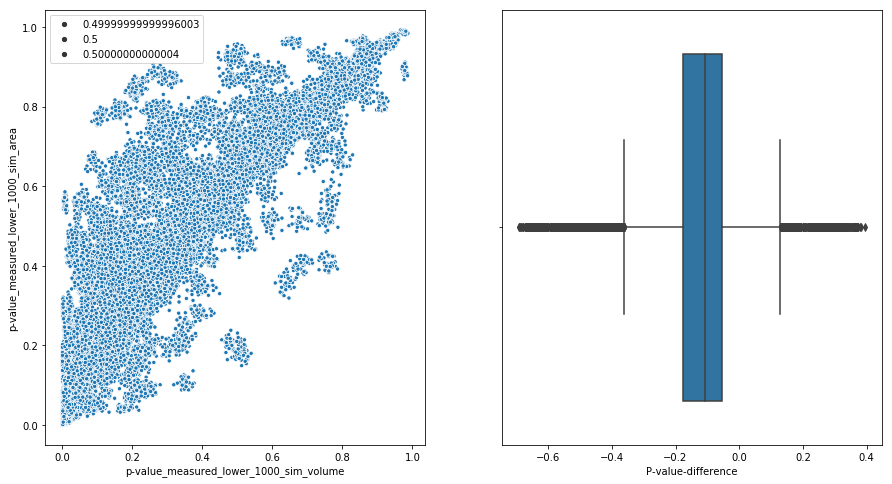

In [21]:
# Compare p-value nn-measured vs. 1000 sampled between volume sampling & area sampling
fig, ax = plt.subplots(1,2, figsize=(15, 8))
print(results_cleaned.shape)
combined_results = results_cleaned.merge(results_non_volume_cleaned, how='inner', on=['Label', 'SiteX','SiteY', 'Well'], suffixes=('_volume', '_area'))
print(combined_results.shape)
combined_results['P-value-difference'] = combined_results['p-value_measured_lower_1000_sim_volume'] - combined_results['p-value_measured_lower_1000_sim_area'] 

sns.scatterplot(x="p-value_measured_lower_1000_sim_volume", y="p-value_measured_lower_1000_sim_area", data=combined_results, size = 0.5, ax=ax[0])

sns.boxplot(combined_results['P-value-difference'], ax=ax[1])

combined_results.columns.values

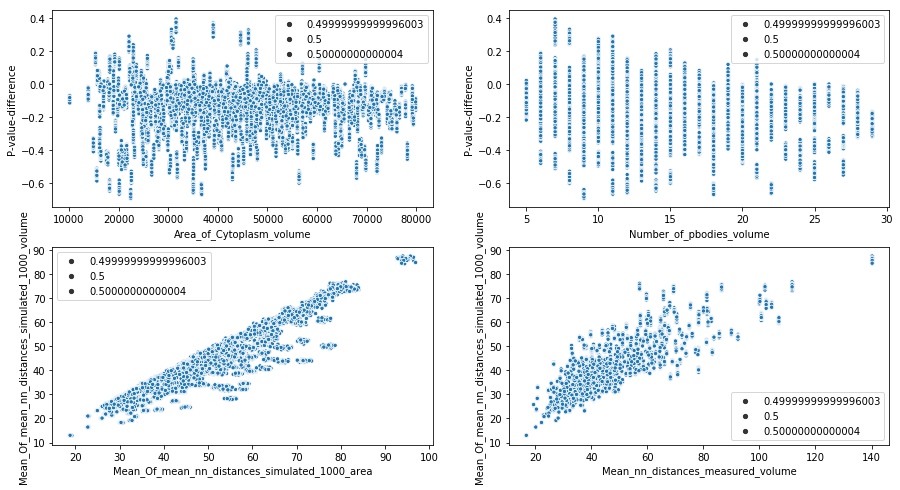

In [27]:
fig, ax = plt.subplots(2,2, figsize=(15, 8))

sns.scatterplot(x="Area_of_Cytoplasm_volume", y="P-value-difference", data=combined_results, size = 0.5, ax=ax[0][0])
sns.scatterplot(x="Number_of_pbodies_volume", y="P-value-difference", data=combined_results, size = 0.5, ax=ax[0][1])
sns.scatterplot(x="Mean_nn_distances_measured_volume", y="P-value-difference", data=combined_results, size = 0.5, ax=ax[1][0])
sns.scatterplot(x="Mean_nn_distances_measured_volume", y="Mean_Of_mean_nn_distances_simulated_1000_volume", data=combined_results, size = 0.5, ax=ax[1][1])


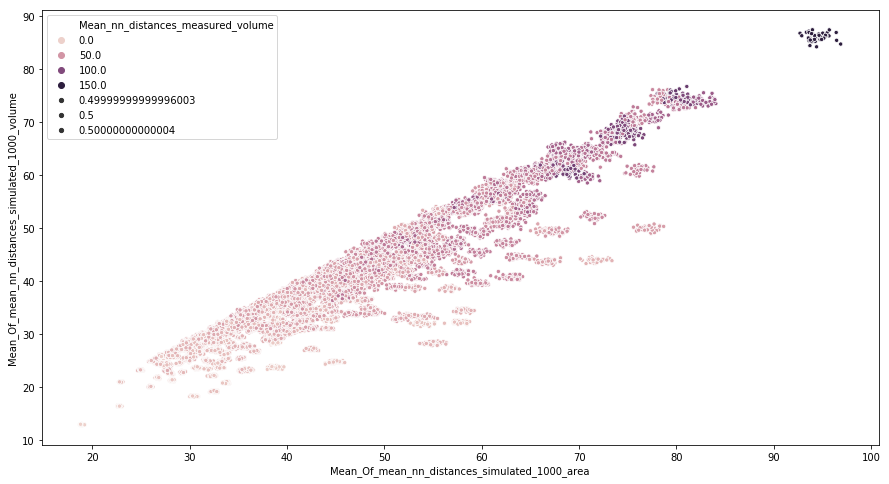

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
#sns.scatterplot(x="Mean_Of_mean_nn_distances_simulated_1000_area", y="Mean_Of_mean_nn_distances_simulated_1000_volume", 
#                data=combined_results, size = 0.5, hue = 'P-value-difference')
sns.scatterplot(x="Mean_Of_mean_nn_distances_simulated_1000_area", y="Mean_Of_mean_nn_distances_simulated_1000_volume", 
                data=combined_results, size = 0.5, hue = 'Mean_nn_distances_measured_volume')


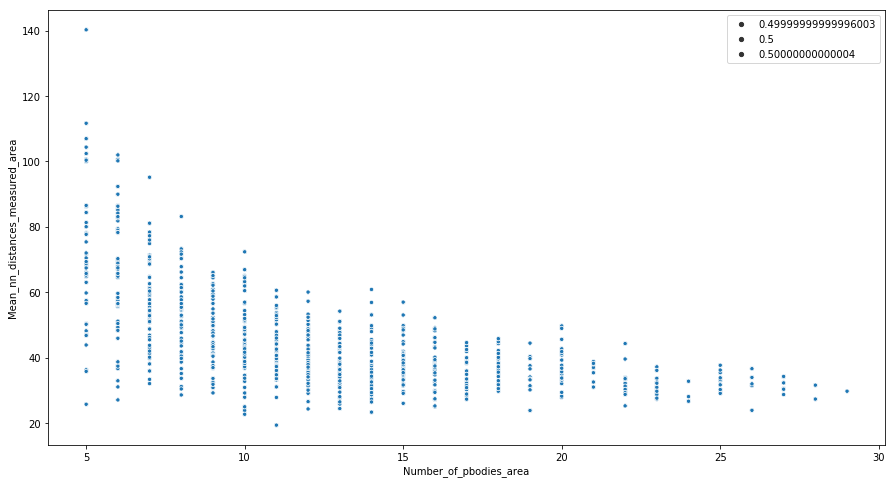

In [32]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))



sns.scatterplot(x="Number_of_pbodies_area", y="Mean_nn_distances_measured_area", 
                data=combined_results, size = 0.5)

In [2]:
# Load in all csv result files for all nearest neighbor distances & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run5_all_individual_nn_distances/AllNearestNeighborDistances_'

nn_results = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    nn_results = pd.concat([nn_results, curr_well])
print(nn_results.columns.values)

5.385164807134505
76
478990
0.00015866719555731853


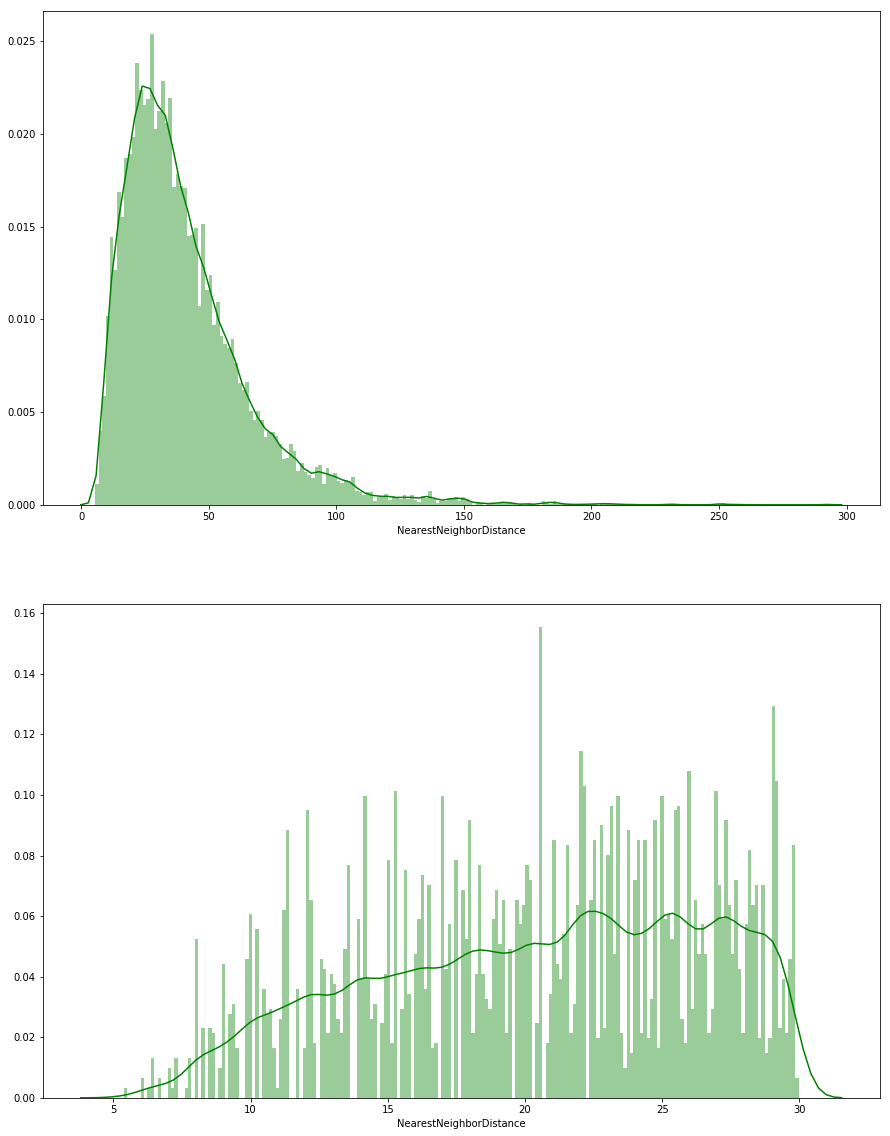

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))


sns.distplot(nn_results['NearestNeighborDistance'], color='green', ax=ax[0], bins = 200)

low_nn = (nn_results['NearestNeighborDistance'] < 30)
nn_results_low = nn_results.loc[low_nn]

sns.distplot(nn_results_low['NearestNeighborDistance'], color='green', ax=ax[1], bins = 200)
print(min(nn_results['NearestNeighborDistance']))

very_low_nn = (nn_results['NearestNeighborDistance'] < 6)
print(np.sum(very_low_nn))
print(len(nn_results))
print(np.sum(very_low_nn)/len(nn_results))

In [25]:
# Load in all csv result files for all nearest neighbor distances & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run6_pbody_numbers_nucleus/NumberPbodiesInNucleus_'

pb_numbers = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    pb_numbers = pd.concat([pb_numbers, curr_well])
print(pb_numbers.columns.values)

['Area_of_Cytoplasm' 'Label' 'Number_of_pbodies_cytoplasm'
 'Number_of_pbodies_in_Nucleus' 'Number_of_pbodies_unshrunken_Nucleus'
 'Number_of_pbodies_unshrunken_cytoplasm' 'SiteX' 'SiteY' 'Well']


-14744.0
0.6315289648622981
0.05256916996047431


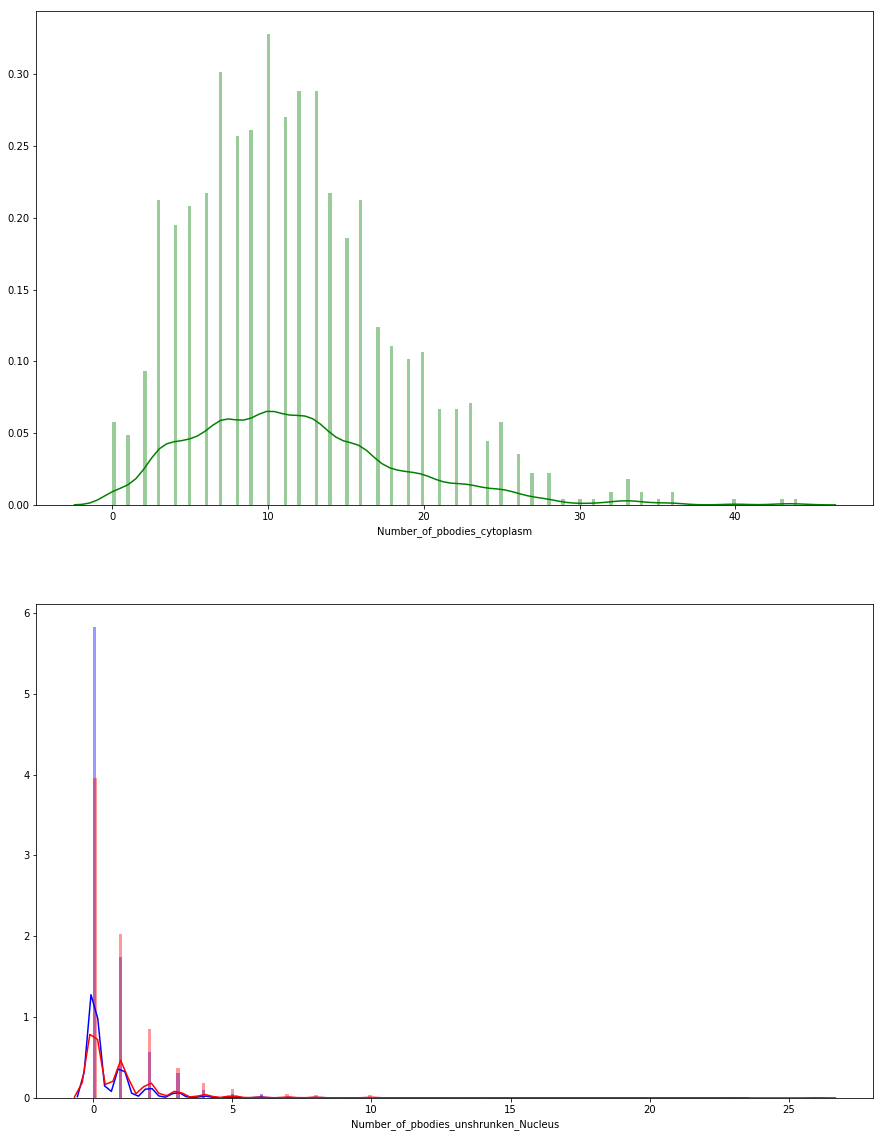

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
sns.distplot(pb_numbers['Number_of_pbodies_cytoplasm'], color='green', ax=ax[0], bins = 200)
sns.distplot(pb_numbers['Number_of_pbodies_in_Nucleus'], color='blue', ax=ax[1], bins = 200)
sns.distplot(pb_numbers['Number_of_pbodies_unshrunken_Nucleus'], color='red', ax=ax[1], bins = 200)
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'] - pb_numbers['Number_of_pbodies_unshrunken_Nucleus']))
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'])/sum(pb_numbers['Number_of_pbodies_unshrunken_Nucleus']))
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'])/(sum(pb_numbers['Number_of_pbodies_cytoplasm']) + sum(pb_numbers['Number_of_pbodies_in_Nucleus'])))

In [30]:
# Load in all csv result files for all nearest neighbor distances & combine them to one pandas table
wells = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
         'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16',
         'E04', 'E05', 'E06', 'E07', 'E08', 'F04', 'F05', 'F06', 'F07', 'F08']

base_path = '../results/run6_pbody_numbers_nucleus/NumberPbodiesInNucleus_shrink6_'

pb_numbers = pd.DataFrame()

for well in wells:
    curr_well = pd.read_csv(base_path + well + '.csv')
    pb_numbers = pd.concat([pb_numbers, curr_well])
print(pb_numbers.columns.values)

['Area_of_Cytoplasm' 'Label' 'Number_of_pbodies_cytoplasm'
 'Number_of_pbodies_in_Nucleus' 'Number_of_pbodies_unshrunken_Nucleus'
 'Number_of_pbodies_unshrunken_cytoplasm' 'SiteX' 'SiteY' 'Well']


In [31]:
#fig, ax = plt.subplots(2, 1, figsize=(15, 20))
#sns.distplot(pb_numbers['Number_of_pbodies_cytoplasm'], color='green', ax=ax[0], bins = 200)
#sns.distplot(pb_numbers['Number_of_pbodies_in_Nucleus'], color='blue', ax=ax[1], bins = 200)
#sns.distplot(pb_numbers['Number_of_pbodies_unshrunken_Nucleus'], color='red', ax=ax[1], bins = 200)
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'] - pb_numbers['Number_of_pbodies_unshrunken_Nucleus']))
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'])/sum(pb_numbers['Number_of_pbodies_unshrunken_Nucleus']))
print(sum(pb_numbers['Number_of_pbodies_in_Nucleus'])/(sum(pb_numbers['Number_of_pbodies_cytoplasm']) + sum(pb_numbers['Number_of_pbodies_in_Nucleus'])))

-21090.0
0.47293447293447294
0.03936758893280633
